<a href="https://colab.research.google.com/github/BodeyMiller2021/Bodey-Miller-Final-Exam/blob/main/Bodey_Miller_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
url = "https://docs.google.com/presentation/d/1_8MRSUcTbfcQAMzbeWyXJFZnaKxSY0pMIJ_hU1dD6Qg/edit#slide=id.g1a19eac43cc_0_471" #link to the goodle slides presentation that has our images

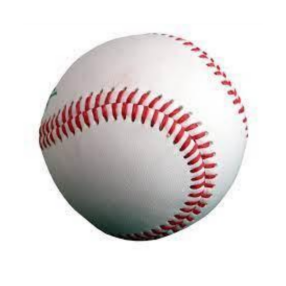

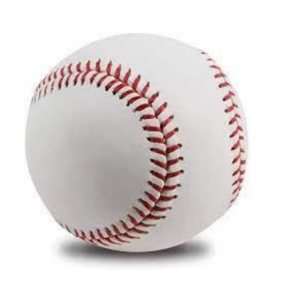

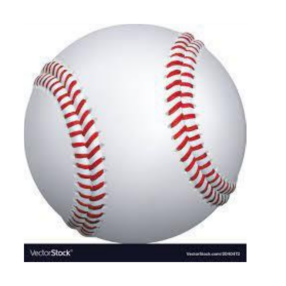

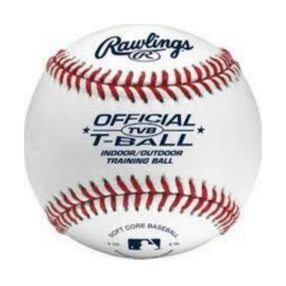

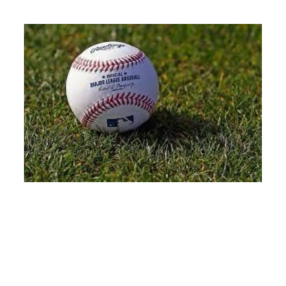

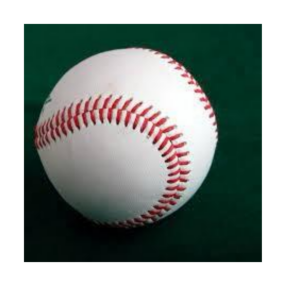

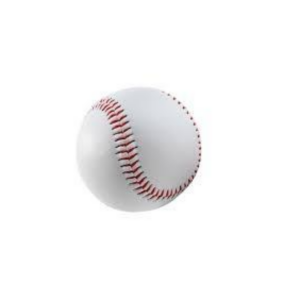

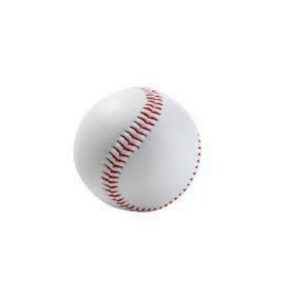

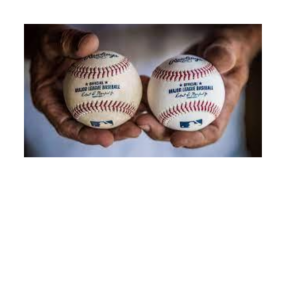

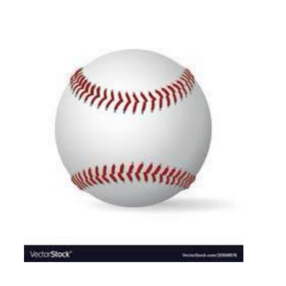

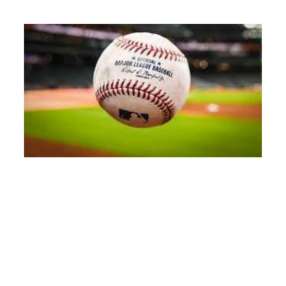

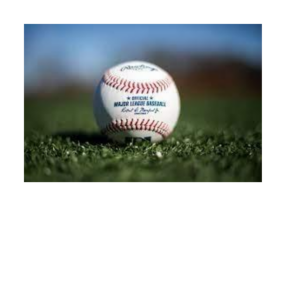

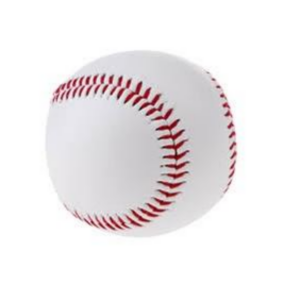

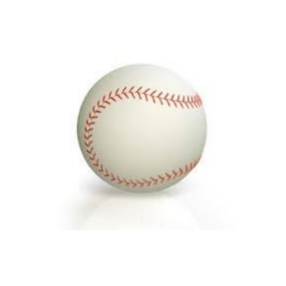

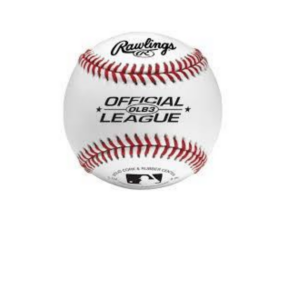

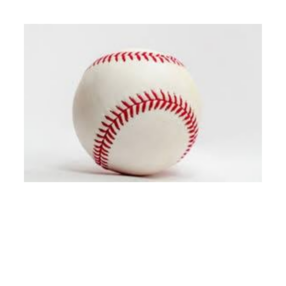

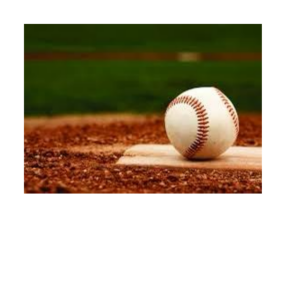

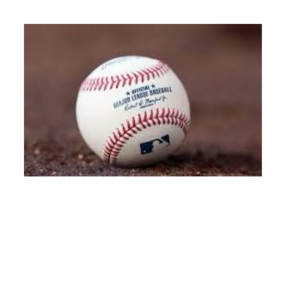

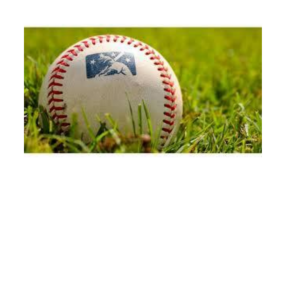

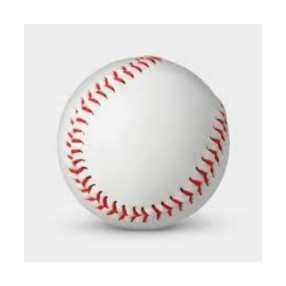

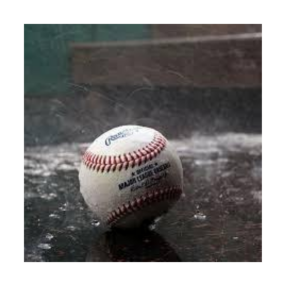

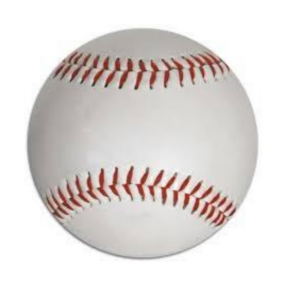

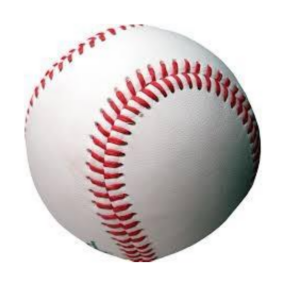

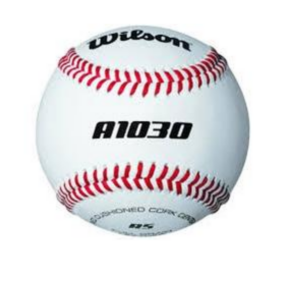

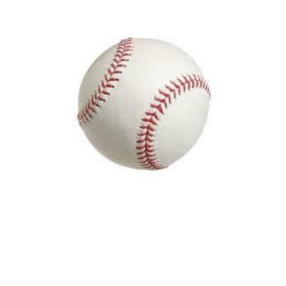

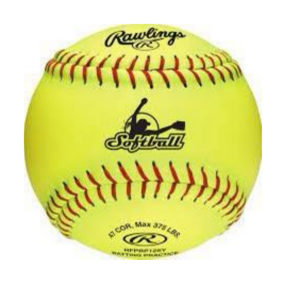

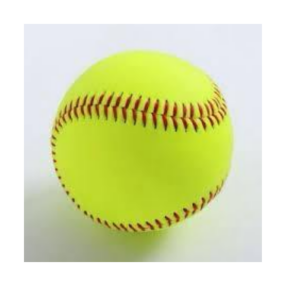

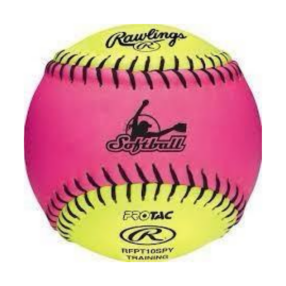

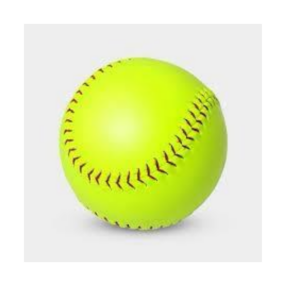

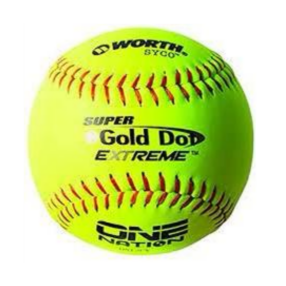

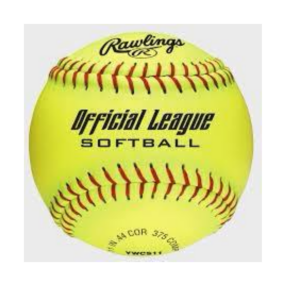

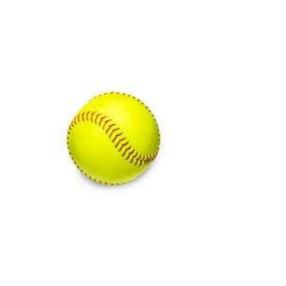

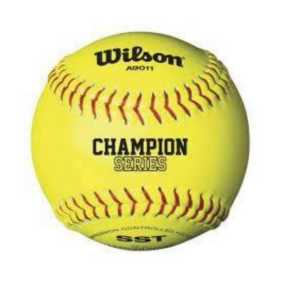

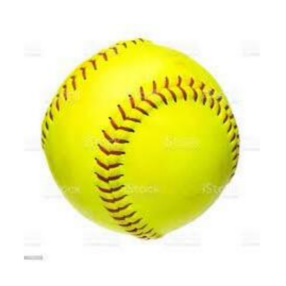

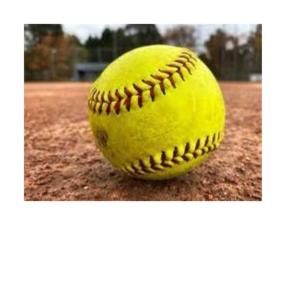

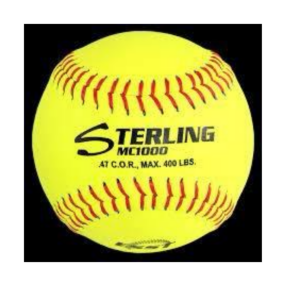

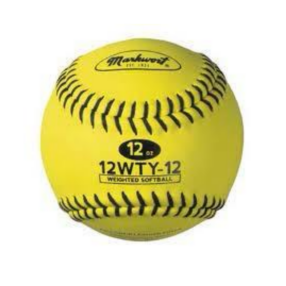

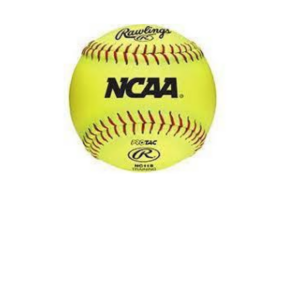

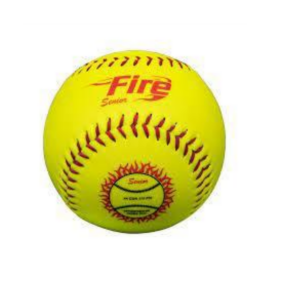

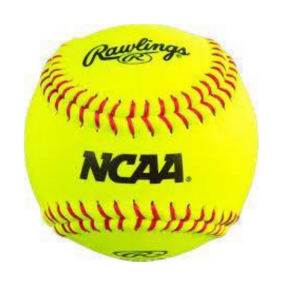

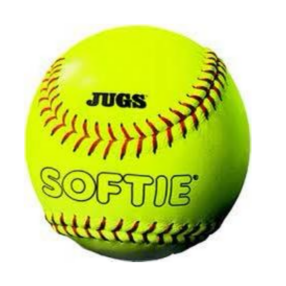

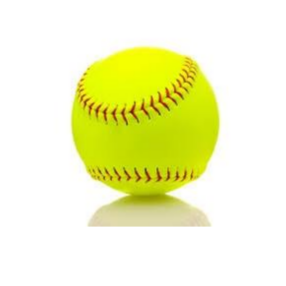

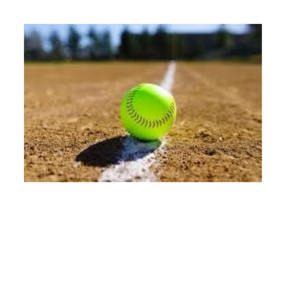

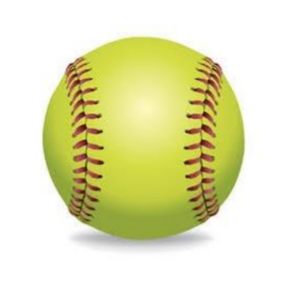

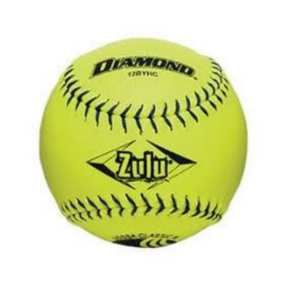

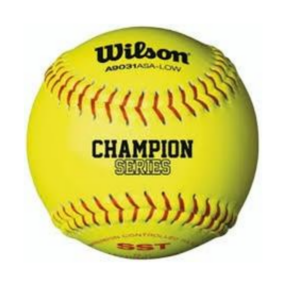

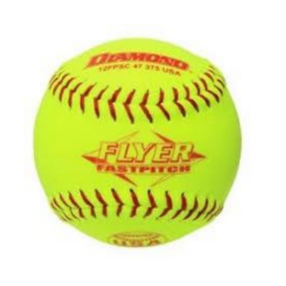

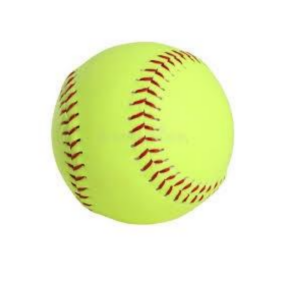

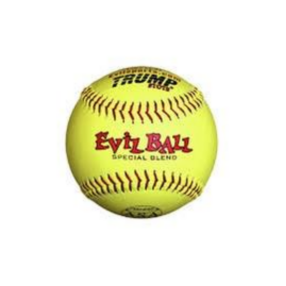

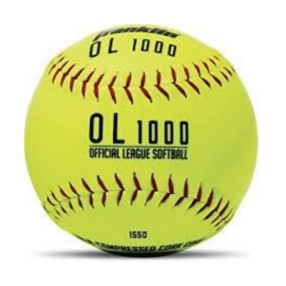

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images) #putting in the images

In [ ]:
images.shape #see how many images we bought in

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-1.9385,  8.0179, 11.5475,  ..., -1.2981, -0.0403,  5.3855],
        [-2.1365,  7.4251, 10.0596,  ..., -2.6114,  1.2725,  8.7854],
        [-1.7421, 10.6679, 12.6412,  ..., -2.7764,  1.5532,  9.1502],
        ...,
        [-1.7800,  0.5692, -0.8049,  ...,  2.3079,  4.5128,  4.7602],
        [-0.3707, -0.9992, -3.5475,  ...,  2.9198,  6.0935,  2.9869],
        [-1.6207, -0.1599, -1.5862,  ...,  3.6493,  3.4370,  7.0549]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape  #shpae is 50 by 1000

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses): #the guesses its given of what the images are
    print(labels[i])

baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
golf ball
baseball
baseball
golf ball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
baseball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
tennis ball
baseball
tennis ball
tennis ball
tennis ball
baseball
tennis ball
tennis ball


In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

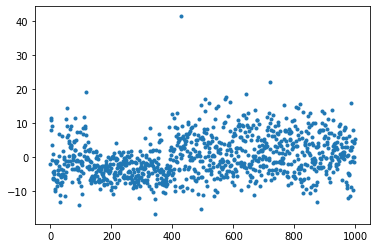

In [ ]:
plt.plot(X[0],'.')

(array([ 14., 200., 389., 238., 128.,  27.,   3.,   0.,   0.,   1.]),
 array([-16.689018 , -10.88049  ,  -5.071963 ,   0.736565 ,   6.5450926,
         12.353621 ,  18.162148 ,  23.970676 ,  29.779203 ,  35.58773  ,
         41.39626  ], dtype=float32),
 <a list of 10 Patch objects>)

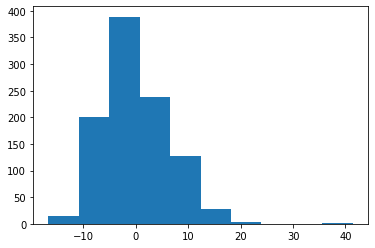

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #Running the best loss functon so that we can see what it is  
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


wandb: Currently logged in as: marvincharles (marvinfau). Use `wandb login --relogin` to force relogin


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
 #run number 1 was .8301

In [ ]:
#run number 2 was .8347

In [ ]:
#run number 3 was .8278